##  k近邻算法的实现: kd树

$kd$树是一种对$k$维空间中的实例点进行存储以便对其进行快速检索的树形数据结构。

$kd$树构造方法：

1. 构造根结点

    使根结点对应于$k$维空间中包含所有实例点的超矩形区域；

2. 递归生成子结点

   通过递归方法，不断地对$k$维空间进行切分，生成子结点。在超矩形区域(结点)上选择一个坐标轴和在此坐标轴上的一个切分点，确定一个超平面，这个超平面通过选定的切分点并垂直于选定的坐标轴，将当前超矩形区域切分为左右两个子区域(子结点)；此时，实例被分配到两个子区域中。该过程中指条件为子区域内没有实例时终止（即终止时的结点为叶节点）。


### 构造平衡kd树算法原理

输入：

$k$维空间数据集$T=\{x_1,x_2,...,x_N\}$，其中$x_i=\left(x_{i}^{(1)},x_{i}^{(2)},x_{i}^{(k)}\right)^{\mathrm{T}}, i=1,2,...,N$;

输出：$kd$树。

一、开始：构造根结点，根结点对应于包含$T$的$k$维空间的超矩形区域。
   
   选择$x^{(1)}$为坐标轴，以$T$中所有实例的$x^{(1)}$坐标的中位数为切分点，将根结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。
   
   由根结点生成深度为1的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域， 右子结点对应于坐标$x^{(1)}$大于切分点的子区域。将落在切分超平面上的实例点保存在根结点。
   

 二、 重复：对深度为$j$的结点，选择$x^{(1)}$为切分的坐标轴，$l＝j(modk)+1$，以该结点的区域中所有实例的$x^{(1)}$坐标的中位数为切分点，将该结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。

   由该结点生成深度为$j+1$的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域，右子结点对应坐标$x^{(1)}$大于切分点的子区域。将落在切分超平面上的实例点保存在该结点。


三、直到两个子区域没有实例存在时停止。从而形成**kd**树的区域划分。

## kd树代码实现


定义kd树，设计kd树的数据结构

In [1]:
#构建结点对象
class KdNode(object):
    def __init__(self, dom_elt, dim=0, left=None, right=None):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.dim = dim  # 整数（进行分割维度的序号）
        self.left = left  # 该结点分割超平面左子空间构成的kd-tree
        self.right = right  # 该结点分割超平面右子空间构成的kd-tree

In [2]:
class KdTree(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        # 按第dim维划分数据集exset创建KdNode
        def _CreateNode(dim, data_set):
            if not data_set:  # 数据集为空
                return None
            
            # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[dim])
            split_pos = len(data_set) // 2  
            median = data_set[split_pos]  # 中位数分割点
            split_next = (dim + 1) % k  # cycle coordinates

            # 递归的创建kd树
            return KdNode(
                median,
                dim,
                _CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                _CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树

        self.root = _CreateNode(0, data)  # 从第0维分量开始构建kd树,返回根节点


# kdTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:  # 节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [3]:
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kd = KdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [4]:
from collections import namedtuple
from operator import itemgetter
from pprint import pformat

class Node(namedtuple('Node', 'location left_child right_child')):
    def __repr__(self):
        return pformat(tuple(self))

def kdtree(point_list, depth=0):
    if not point_list:
        return None

    k = len(point_list[0]) # 假定所有点的尺寸相同
    # 根据深度选择轴
    axis = depth % k
 
    # 根据轴对点的列表进行排序，并选择中间值作为轴元素
    point_list.sort(key=itemgetter(axis))
    median = len(point_list) // 2
 
    # 创建结点并构建子树
    return Node(
        location=point_list[median],
        left_child=kdtree(point_list[:median], depth + 1),
        right_child=kdtree(point_list[median + 1:], depth + 1)
    )

def main():
    """构建kd树-案例"""
    point_list = [(7,2), (5,4), (9,6), (4,7), (8,1), (2,3)]
    tree = kdtree(point_list)
    print(tree)

if __name__ == '__main__':
    main()

((7, 2),
 ((5, 4), ((2, 3), None, None), ((4, 7), None, None)),
 ((9, 6), ((8, 1), None, None), None))


### scikit-learn中的 k-d-tree案例

scikit-learn是一个机器学习类库，里面实现了KDTree。

下面例子，构建一个二维空间的kd树，然后对其作k近邻搜索以及指定半径的搜索。

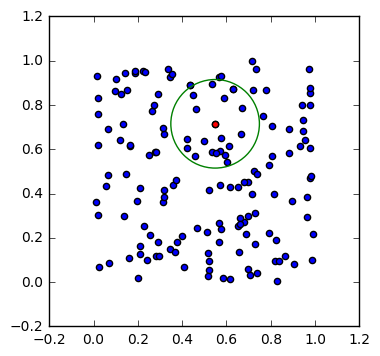

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from sklearn.neighbors import KDTree
np.random.seed(0)
# 随机产生150个二维数据
points = np.random.random((150, 2))
tree = KDTree(points)
point = points[0]
# k近邻发搜索
dists, indices = tree.query([point], k=4)

# q指定半径搜索
indices = tree.query_radius([point], r=0.2)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.add_patch(Circle(point, 0.2, color='g', fill=False))
X, Y = [p[0] for p in points], [p[1] for p in points]
plt.scatter(X, Y)
plt.scatter([point[0]], [point[1]], c='r')
plt.show()

**上述案例均已通过**

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

整理制作：深度学习学研社

<div>
<table align="left" border="1" bordercolor="#000000">
    <div>
    <tr>
        <td>
            微信公众号：ID: AI_class_vip<br>
            <img src="../image/gongzhonghao.jpg" width="150" height="150" align="left"/>    
        </td>
    </tr>
    </div>
    <div>
    <tr>
        <td>
        知识星球：机器学习交流学习圈：<br>
    <img src="../image/dlzhishixingqiu.jpg" width="150" height="150" align="left"/>  
        </td>
    </tr>
        </div>
    <div>
     <tr>
        <td>
        配置环境：python 3.4+  
        </td>
    </tr>
        </div>
</table>
</div>
